## Fetch Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data with headers
headers = ["Industrial_Risk", "Management_Risk", "Fin_Flexibty", "Credibility",
           "Competitiveness", "Operating_Risk", "Class"]

data = pd.read_table('Qualitative_Bankruptcy.txt', delimiter = ',', names=headers)
data

,Industrial_Risk,Management_Risk,Fin_Flexibty,Credibility,Competitiveness,Operating_Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
...,...,...,...,...,...,...,...
245,N,N,A,N,N,N,B
246,P,N,N,N,N,N,B
247,A,N,N,N,N,N,B
248,N,N,N,N,N,N,B


## Explotary Data Analysis and Data Visualization

In [3]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Industrial_Risk  250 non-null    object
 1   Management_Risk  250 non-null    object
 2   Fin_Flexibty     250 non-null    object
 3   Credibility      250 non-null    object
 4   Competitiveness  250 non-null    object
 5   Operating_Risk   250 non-null    object
 6   Class            250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [4]:
# properties of data
data.describe()

,Industrial_Risk,Management_Risk,Fin_Flexibty,Credibility,Competitiveness,Operating_Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


In [5]:
# check the unique values 
for column in (data.columns):
    print(f"Unique values of '{column}' column = {(data[column].unique())}")

Unique values of 'Industrial_Risk' column = ['P' 'N' 'A']
Unique values of 'Management_Risk' column = ['P' 'N' 'A']
Unique values of 'Fin_Flexibty' column = ['A' 'P' 'N']
Unique values of 'Credibility' column = ['A' 'P' 'N']
Unique values of 'Competitiveness' column = ['A' 'P' 'N']
Unique values of 'Operating_Risk' column = ['P' 'N' 'A']
Unique values of 'Class' column = ['NB' 'B']


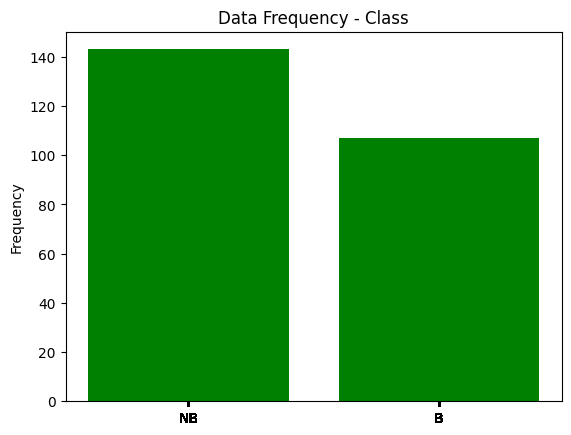

Number of Class 
NB    143
B     107
Name: Class, dtype: int64


In [6]:
# Number of Conclusions
plt.figure()
plt.bar(data["Class"].value_counts().index, data["Class"].value_counts(), color = "g")
plt.xticks(data["Class"].values)
plt.ylabel("Frequency")
plt.title(f"Data Frequency - Class")
plt.show()
print(f"Number of Class \n{data['Class'].value_counts()}")

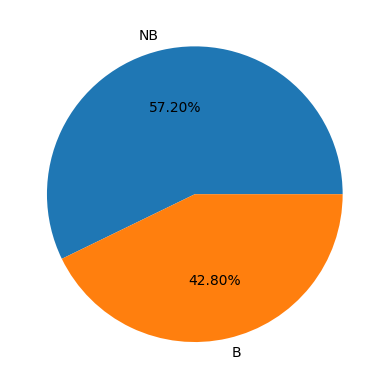

In [7]:
# plot a pie chart and see percentages of Conclusion
plt.pie(data['Class'].value_counts(), labels=data['Class'].unique(), autopct='%1.2f%%')
plt.show() 

In [8]:
# create a function for plot bar graph 
def plotBar(column, n=10):
    """
        input: column name
               n = the most unique value you want to see, default = 10
        output: Bar plot
    """
    data_ = data[column]
    data_count = data_.value_counts()
    data_count = data_count[:n]
    plt.figure()
    plt.bar(data_count.index, data_count, color = "m")
    plt.xticks(data_count.index, data_count.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.title(f"Data Frequency - {column}")
    plt.show()
    print(f"   {column}\n{data_count}")

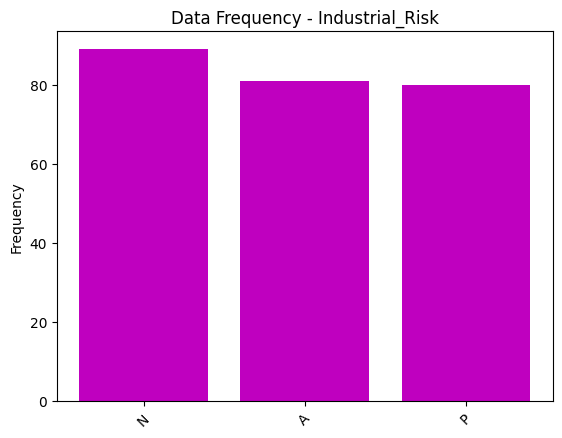

   Industrial_Risk
N    89
A    81
P    80
Name: Industrial_Risk, dtype: int64


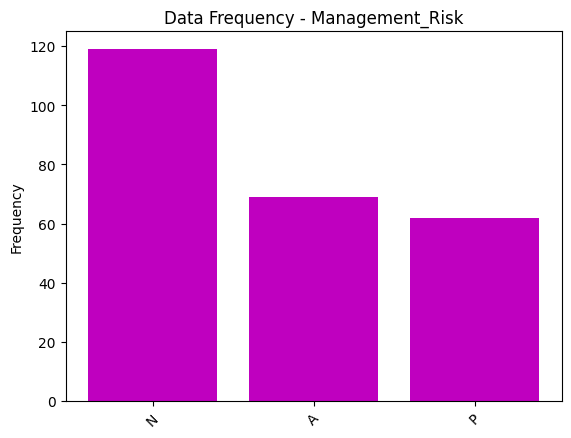

   Management_Risk
N    119
A     69
P     62
Name: Management_Risk, dtype: int64


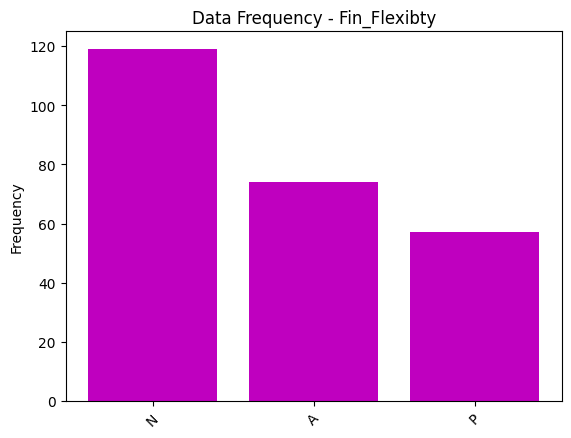

   Fin_Flexibty
N    119
A     74
P     57
Name: Fin_Flexibty, dtype: int64


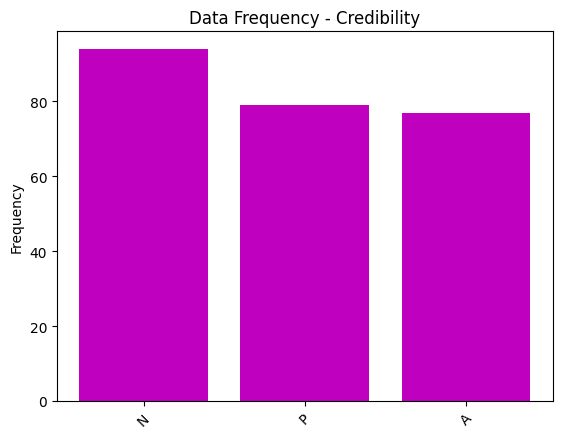

   Credibility
N    94
P    79
A    77
Name: Credibility, dtype: int64


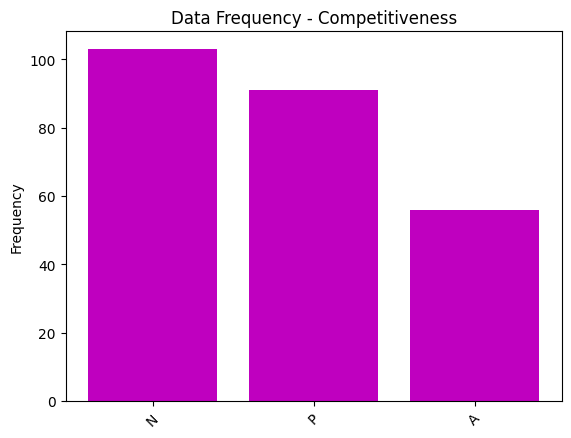

   Competitiveness
N    103
P     91
A     56
Name: Competitiveness, dtype: int64


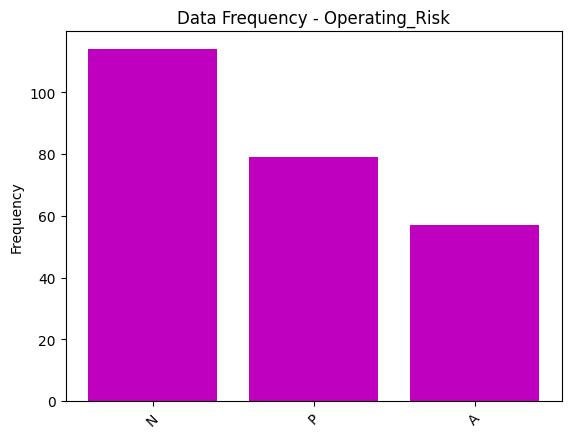

   Operating_Risk
N    114
P     79
A     57
Name: Operating_Risk, dtype: int64


In [9]:
# plot bar graph for categorical variables
categorical_variables = ["Industrial_Risk", "Management_Risk", "Fin_Flexibty",
                         "Credibility", "Competitiveness", "Operating_Risk"]
for i in categorical_variables:
    plotBar(i)

In [10]:
#Exploratory Visualization

def visualization(column):
    def values(column):
        d = {} #creating a dictionary
        d1 = data[[column, 'Class']] #extracting the column and the class columns from the data
        for j in d1[column].unique(): #for each unique attribute of the selected column
            d2 = (d1[d1[column] == j])['Class'].value_counts()  #give the number of unique value of Class for each attribute
            for i in d1['Class'].unique(): #unique values of class
                if i in d2: 
                    if i in d:
                        d[i].append(d2[i]) 
                    else:
                        d[i] = []   #creating a key with the name of the target label and the value is the number of examples
                        d[i].append(d2[i])
                else:
                    if i in d:
                        d[i].append(0)
                    else:
                        d[i] = []
                        d[i].append(0)
        return d
    
    N=len(data[column].unique())
    w=0.3
    x=np.arange(N)
    dict1 = values(column)
    ax = plt.subplot(111)
    p1 = ax.bar(x-(1.5*w), dict1['NB'], width = w, color = 'g', align = 'center')
    p2 = ax.bar(x-(0.5*w), dict1['B'], width = w, color = 'r', align = 'center')

    ax.autoscale(tight=True)
    plt.xlabel("'{}' column".format(column))
    plt.title(f"'{column}' column distribution by class Label")
    plt.ylabel('Frequency')
    plt.xticks(x, data[column].unique())
    plt.yticks(np.arange(0, 250, 50))
    plt.legend((p1[0], p2[0]), ('NoBankruptcy', 'Bankruptcy'))
    plt.show()

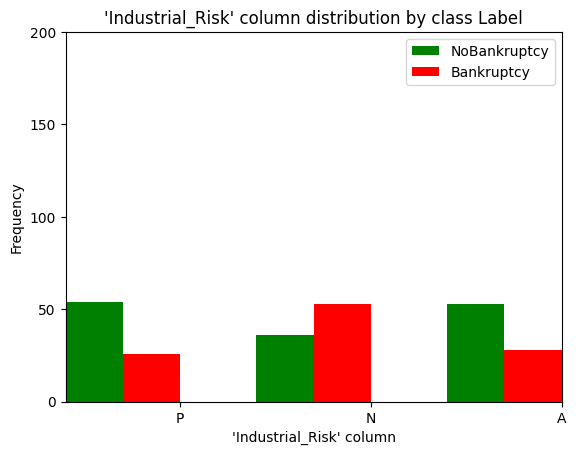

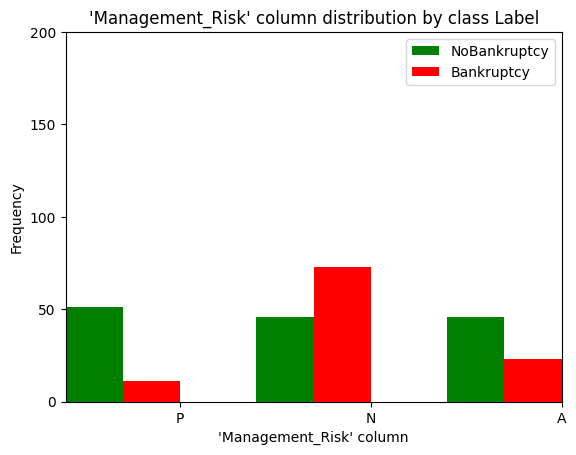

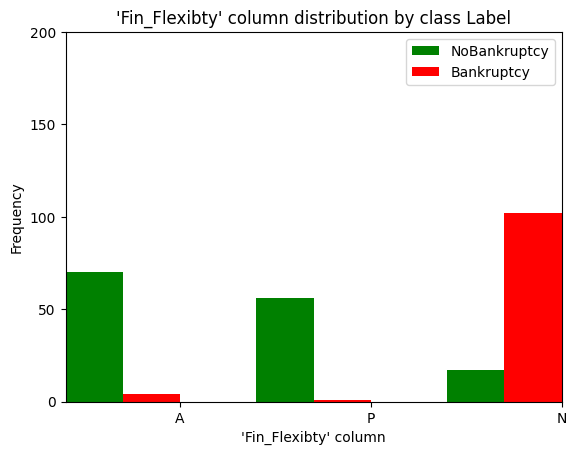

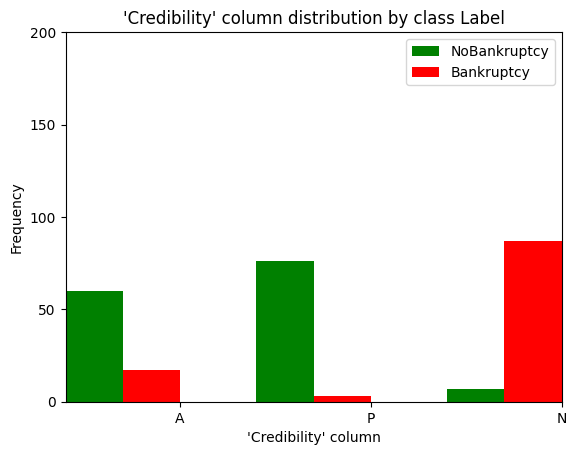

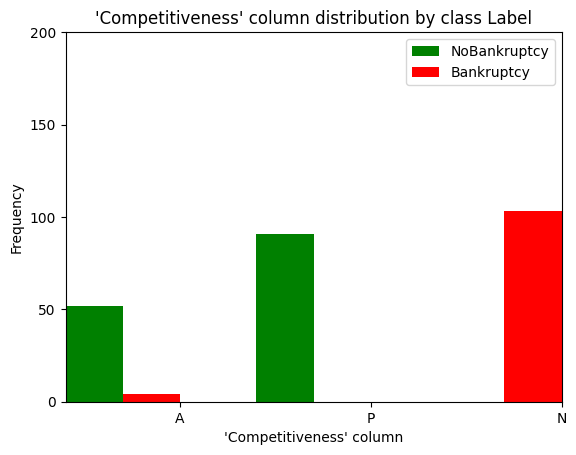

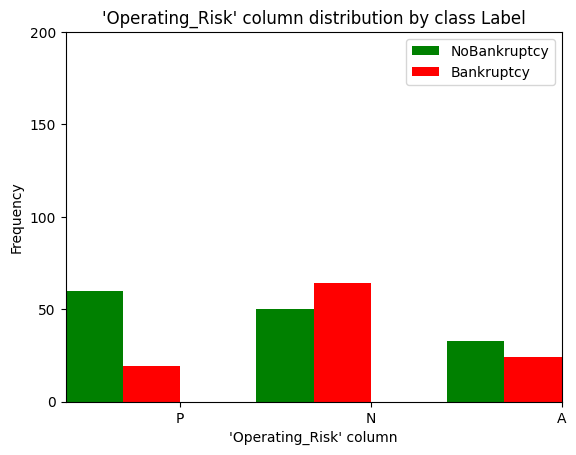

In [11]:
columns_name = data.drop(labels="Class", axis=1).columns
for i in columns_name:
    visualization(i)

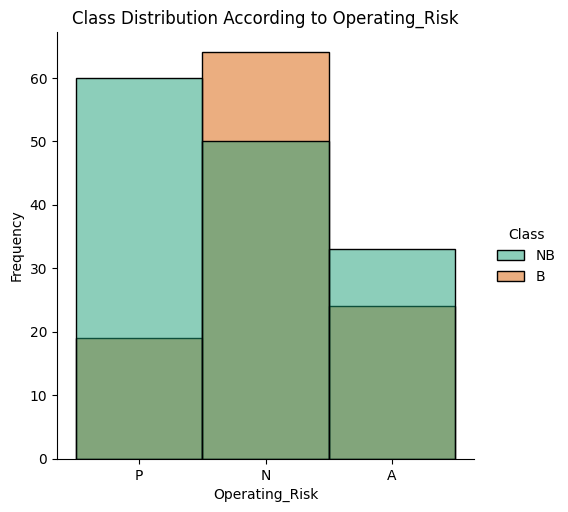

In [12]:
sns.displot(data, x="Operating_Risk", hue="Class", palette="Dark2")
plt.ylabel("Frequency")
plt.title("Class Distribution According to Operating_Risk")
plt.show()

## Preprocessing

In [13]:
from sklearn.preprocessing import LabelEncoder
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn

In [14]:
for i in data.columns:
    print(f"For {i} column ")
    data[f"{i}"] = labelEncoder(data[f"{i}"])
    print("**********************************")

For Industrial_Risk column 
Encoding Approach:
P  ==>  2
N  ==>  1
A  ==>  0
**********************************
For Management_Risk column 
Encoding Approach:
P  ==>  2
N  ==>  1
A  ==>  0
**********************************
For Fin_Flexibty column 
Encoding Approach:
A  ==>  0
P  ==>  2
N  ==>  1
**********************************
For Credibility column 
Encoding Approach:
A  ==>  0
P  ==>  2
N  ==>  1
**********************************
For Competitiveness column 
Encoding Approach:
A  ==>  0
P  ==>  2
N  ==>  1
**********************************
For Operating_Risk column 
Encoding Approach:
P  ==>  2
N  ==>  1
A  ==>  0
**********************************
For Class column 
Encoding Approach:
NB  ==>  1
B  ==>  0
**********************************


In [15]:
data

,Industrial_Risk,Management_Risk,Fin_Flexibty,Credibility,Competitiveness,Operating_Risk,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1
...,...,...,...,...,...,...,...
245,1,1,0,1,1,1,0
246,2,1,1,1,1,1,0
247,0,1,1,1,1,1,0
248,1,1,1,1,1,1,0


In [16]:
# create input and output
X = data.drop('Class', axis = 1)
y = data['Class']

In [17]:
# for train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=128)

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (212, 6)
y_train: (212,)
X_test: (38, 6)
y_test: (38,)


## Model Training and Evaluation

In [18]:
# import classifiers and metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

def allClassifiers(X_train, X_test, y_train, y_test):
    """
    This function use multiple machine learning classifier and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: accuracy score, classification report, confusion matrix for each classifier 
    and comparison plot for classifiers according to accuracy
    """
    
    
    classifiers = [SVC(), DecisionTreeClassifier(), GaussianNB(), KNeighborsClassifier(),
                   BaggingClassifier(), RandomForestClassifier(), AdaBoostClassifier(),
                   LogisticRegression(), XGBClassifier()]
    accuracy_score_dict = {}
    acc_scores = []
    
    
    # function for accuracy score
    def accScore(classifier):
        """
        :param classifier: classifier model function
        :return: accuracy score for classifier
        """
        
        clf = classifier.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_score = accuracy_score(y_test, pred)
        return acc_score
    

    # function for confusion matrix and classification report
    def confusionandReport(classifier):
        """
        :param classifier: classifier model function
        :return: confusion matrix and classification report for classifier
        """
        
        clf = classifier.fit(X_train, y_train)
        pred = clf.predict(X_test)
        print(f"Confusion Matrix and Classification Report for {classifier} Classifier")
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred))


    # accuracy score, confusion matrix and classification report for each classifier 
    for classifier in classifiers:
        name = classifier.__class__.__name__
        accuracy_score_dict[name] = accScore(classifier)
        acc_scores.append(accScore(classifier))
        print("*************************************************************************")
        print(f"{name} Accuracy Score = {accuracy_score_dict[name]}")
        confusionandReport(classifier)
        

    #Plotting the performance of Classifiers
    def plotPerformance(scores_list, scores_dict):
        """
        :param scores_list: list that include evaluation scores 
        :param scores_dict: dictionary that include classifier and evaluation scores
        :return: plot of performance comparison of classifiers
        """
        
        N = len(classifiers)
        w = 0.5
        x = np.arange(N)
        plt.bar(x, scores_list, width = w, align = 'center', color="g")
        plt.xlabel("Classifiers")
        plt.title("Performance Comparison of Classifiers")
        plt.ylabel("Accuracy Score")
        plt.xticks(x,
                   scores_dict.keys(),
                   rotation=90)
        plt.yticks(np.arange(0, 1.1, 0.1))
        plt.show()
    
    # call the function
    plotPerformance(acc_scores, accuracy_score_dict)

*************************************************************************
SVC Accuracy Score = 0.9736842105263158
Confusion Matrix and Classification Report for SVC() Classifier
[[13  1]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.96      1.00      0.98        24

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.97      0.97      0.97        38

*************************************************************************
DecisionTreeClassifier Accuracy Score = 1.0
Confusion Matrix and Classification Report for DecisionTreeClassifier() Classifier
[[14  0]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        24

    accuracy                           1.00        38
   macro avg       1.00      1.00     

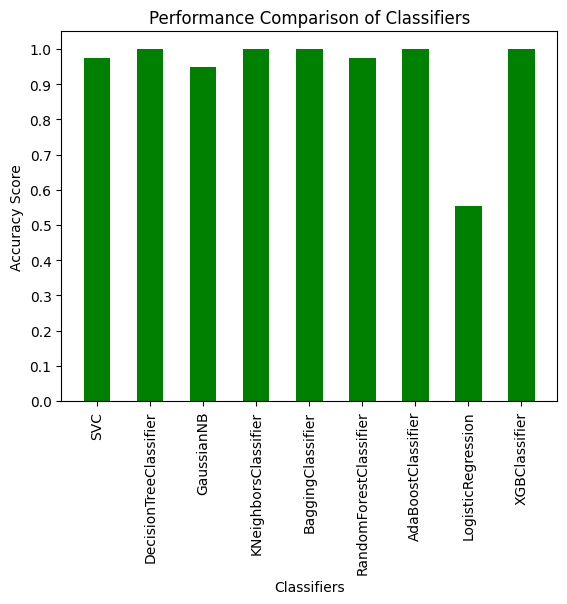

In [19]:
allClassifiers(X_train, X_test, y_train, y_test)

## Model Selection and Parameter Tuning

In [20]:
# There many model tha gives us 1.0 accuracy score therefore we can use LogisticRegression Accuracy Score = 0.5526315789473685 for parameter tuning
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_train_predictions = lr_model.predict(X_train)
lr_test_predictions = lr_model.predict(X_test)
print('Train Accuracy Score for Logistic Regression Classifier:', accuracy_score(lr_train_predictions, y_train))
print("Test Accuracy Score for Logistic Regression Classifier:", accuracy_score(lr_test_predictions, y_test))
print(confusion_matrix(y_test, lr_test_predictions))
print(classification_report(y_test, lr_test_predictions))

Train Accuracy Score for Logistic Regression Classifier: 0.6037735849056604
Test Accuracy Score for Logistic Regression Classifier: 0.5526315789473685
[[ 5  9]
 [ 8 16]]
              precision    recall  f1-score   support

           0       0.38      0.36      0.37        14
           1       0.64      0.67      0.65        24

    accuracy                           0.55        38
   macro avg       0.51      0.51      0.51        38
weighted avg       0.55      0.55      0.55        38



In [21]:
# GridSearchCV for LogisticRegression Classifier
from sklearn.model_selection import GridSearchCV
lr_params = { 'penalty' : ['l1', 'l2'],
              'C' : [100, 10, 1.0, 0.1, 0.01],
              'solver' : ['liblinear', 'saga']}
gsc_rf = GridSearchCV(lr_model, lr_params, cv=3, verbose=1, n_jobs=1)
grid_results_rf = gsc_rf.fit(X_train, y_train)
grid_results_rf.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [22]:
# Summarize the results in a readable format
print(f"Best 8 test score: {(np.sort(grid_results_rf.cv_results_['mean_test_score']))[::-1][:8]}")
results_df = pd.DataFrame(grid_results_rf.cv_results_)

cleaned_results_df = results_df[["mean_fit_time", "mean_test_score", "std_test_score", "rank_test_score"]]
cleaned_results_df.sort_values("rank_test_score",).head(3)

Best 8 test score: [0.56130114 0.5518444  0.5518444  0.54714956 0.54258887 0.53782696
 0.53782696 0.53782696]


,mean_fit_time,mean_test_score,std_test_score,rank_test_score
17,0.004150,0.561301,0.002940,1
18,0.007576,0.551844,0.008570,2
15,0.004092,0.551844,0.040748,3


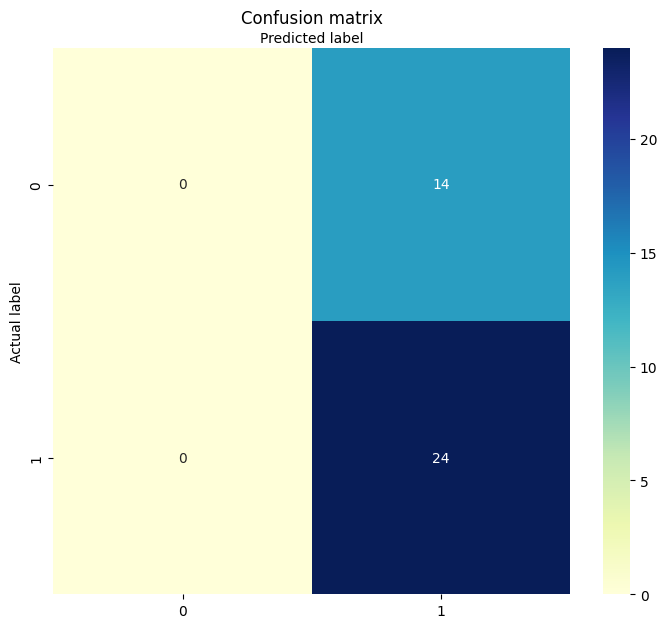

After Tuning Test Accuracy Score for Logistic Regression Classifier: 0.631578947368421


In [23]:
# Extract the best model
best_clf = grid_results_rf.best_estimator_
y_pred = best_clf.predict(X_test)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Create heatmap from the confusion matrix
%matplotlib inline
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("After Tuning Test Accuracy Score for Logistic Regression Classifier:", accuracy_score(y_pred, y_test))

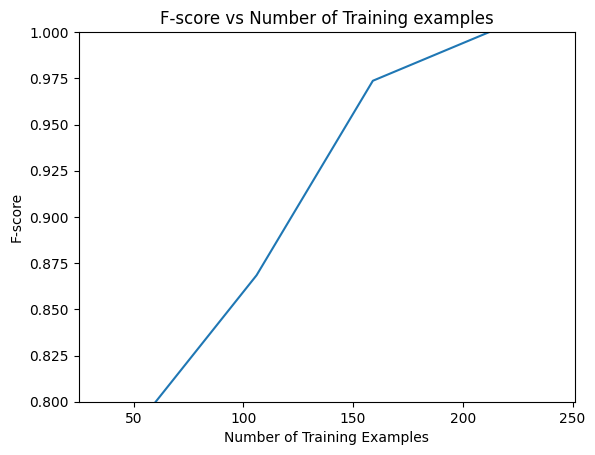

In [24]:
#Measuring performance of the model with different sample size of the training data
def sample_predictions(sample_size):
    optimum_model = KNeighborsClassifier()
    input_sample = X_train[:sample_size]
    class_sample = y_train[:sample_size]
    optimum_model = optimum_model.fit(input_sample, class_sample)
    sample_predictions = optimum_model.predict(X_test)
    sample_score = f1_score(sample_predictions, y_test, average = 'micro')
    return sample_score

x_values = []
y_values = []
counter = 53
while(counter <= len(y_train)):
    x_values.append(counter)
    y_values.append(sample_predictions(counter))
    counter = counter + 53
plt.plot(x_values, y_values)
plt.axis([25, 251, 0.8, 1])
plt.title("F-score vs Number of Training examples")
plt.xlabel("Number of Training Examples")
plt.ylabel("F-score")
plt.show()